# **개요**

당신 게임 회사의 데이터 팀에 합류했습니다.

다음 분기에 어떤 게임을 설계해야 할까

라는 고민을 해결하기 위해, 기존의 데이터에 기반하여 인사이트를 얻고, 의사결정을 하고자 하는 것이 여러분의 목표입니다.

아래의 링크를 통해 파일을 다운로드 받으세요.

https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv


In [380]:
# import를 사용해 pandas를 가져오고 csv링크를 읽어옵니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')

# Data Description
* Name : 게임의 이름입니다.
* Platform : 게임이 지원되는 플랫폼의 이름입니다.
* Year : 게임이 출시된 연도입니다.
* Genre : 게임의 장르입니다.
* Publisher : 게임을 배급한 회사입니다.
* NA_Sales : 북미지역에서의 출고량입니다.
* EU_Sales : 유럽지역에서의 출고량입니다.
* JP_Sales : 일본지역에서의 출고량입니다.
* Other_Sales : 기타지역에서의 출고량입니다.

## 참고용
* Sprint 1 : EDA, Feature Engineering, Data Manipulation, Data Visualization
* Sprint 2 : Hypothesis Test, CI, Bayesian, AB Test
* Sprint 3 : DR, PCA, Clustering, GD

Section 1때 배운 내용을 토대로 Mission을 달성해주세요.

1. **"지역에 따라서 선호하는 게임 장르가 다를까" 라는 질문에 대답을 하셔야합니다.**
* 지역은 어떻게 구분했나요?
* 지역별로 선호하는 게임의 장르를 파악했나요?
* 지역별로 선호하는 게임의 장르가 왜 같다고/다르다고 생각했나요?
2. **연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.**
* 트렌드는 어떤 것을 기준으로 파악했나요?
* 연도별로 트렌드가 존재하나요?
* 왜 존재한다/존재하지 않는다고 생각했나요?
3. **인기가 많은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.**
* 인기가 많다는 것을 어떻게 정의했나요?
* 해당 게임이 왜 인기가 많다고 생각했나요?
* 시각화를 통해 무엇을 나타내고자 하는지를 고려했나요?
* 해당 분석을 통해 어떤 인사이트를 도출할 수 있나요?
4. **다음 분기에 어떤 게임을 설계해야 하는지에 대한 결론이 제시되어야 합니다.**

더불어 유의미한 인사이트를 도출하기 위해서는

다음 분기가 언제인지 회사의 규모는 어느정도인지와 
같은 디테일한 상황 설정과 더불어 '왜' 이러한 결론을 
도출하였는지에 대한 고민이 필요합니다.

위의 4가지 내용에 여러분들의 개인적인 분석 목표, 질문을 더하여 프로젝트를 완성하세요.

In [381]:
# info를 사용해 각 컬럼별로 타입과 결측치 등의 정보를 출력합니다.
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,9,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [382]:
df = df.drop(columns = 'Unnamed: 0')
# Unnamed 컬럼 제거

In [383]:
# 완전 중복값 컬럼 제거
df.duplicated().sum()
df = df.drop_duplicates()

In [384]:
# 결측치 포함된 행 확인
df[df['Genre'].isna() | df['Year'].isna() | df['Platform'].isna()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
50,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
273,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
358,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0,0,0
...,...,...,...,...,...,...,...,...,...
16425,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0
16431,Cars: Mater-National Championship,X360,2007.0,NaN,THQ,0.13,0,0,0.01
16432,Bejeweled 3,X360,NaN,Puzzle,Unknown,0.13,0,0,0.01
16555,Apache: Air Assault,PC,2010.0,NaN,Just Flight,0,0.03,0,0.01


In [385]:
df[df.duplicated(subset=['Name', 'Platform', 'Year', 'Genre', 'Publisher'], keep=False)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
7346,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,2.11,0.23,0,0.22
8717,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0,0.01,0,0


In [386]:
df[df.duplicated(subset=['Name', 'Genre'], keep=False)].sort_values(['Name', 'Genre', 'Publisher'])

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2660,007: Quantum of Solace,PS2,2008.0,Action,Activision,0.17,0,0,0.26
5504,007: Quantum of Solace,Wii,2008.0,Action,Activision,0.3,0.29,0.01M,0.07
6839,007: Quantum of Solace,PS3,2008.0,Action,Activision,0.43,0.52,0.02,0.2
8867,007: Quantum of Solace,PC,2008.0,Action,Activision,0.01,0.01,0,0
9465,007: Quantum of Solace,DS,2008.0,Action,Activision,0.11,0.01,0,0.01
...,...,...,...,...,...,...,...,...,...
11280,pro evolution soccer 2011,PSP,2010.0,Sports,Konami Digital Entertainment,0.05,0.3,0.29,0.16
13757,pro evolution soccer 2011,Wii,2010.0,Sports,Konami Digital Entertainment,0.08,0.1,0.03,0.02
16251,pro evolution soccer 2011,PS2,2010.0,Sports,Konami Digital Entertainment,0.04,0.21,0.05,0.11
3062,uDraw Studio: Instant Artist,X360,2011.0,Misc,THQ,0.01,0.01,0,0


In [387]:
# Publisher의 결측치를 Unknown으로 대체
df['Publisher'] = df['Publisher'].fillna('Unknown')

<ipython-input-387-6e86e6ddf056>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Publisher'] = df['Publisher'].fillna('Unknown')


In [388]:
# Genre의 결측치를 Unknown으로 대체
df['Genre'] = df['Genre'].fillna('Unknown')

In [389]:
df[df['Name'].str.contains('Grand Theft Auto V')].sort_values(['Year'])

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3447,Rockstar Games Double Pack: Grand Theft Auto I...,PS2,2003.0,Action,Take-Two Interactive,0.85,0.66,0,0.22
5267,Rockstar Games Double Pack: Grand Theft Auto I...,XB,2003.0,Action,Take-Two Interactive,1.84,0.56,0,0.09
3483,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14
10913,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63M,5.31,0.06,1.38
2008,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.8,5.81,0.36,2.02
10834,Grand Theft Auto V,XOne,2014.0,Action,Take-Two Interactive,2.66,2.01,0,0.41
16575,Grand Theft Auto V,PC,2015.0,Action,Take-Two Interactive,0.36,0.64,0,0.08


In [390]:
#같은 이름, 같은 배급사를 가진 게임의 년도가 NaN일 경우 채워주는 함수
df['Year'] = df.groupby(['Name', 'Publisher'])['Year'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

In [391]:
df[df['Year'].isna()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
273,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
358,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0,0,0
430,Famista 64,N64,NaN,Sports,Namco Bandai Games,0,0,0.17,0.03
...,...,...,...,...,...,...,...,...,...
16240,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0,0,0
16275,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0M,0.03
16278,Madden NFL 11,Wii,NaN,Sports,Unknown,0.7,0,0,50K
16425,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0


In [392]:
df[df['NA_Sales'].str.contains('\D')].sort_values(by = 'NA_Sales', ascending = False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
13057,Mark Davis Pro Bass Challenge,PS2,2002.0,Sports,Natsume,90K,0.07,0,0.02
13798,King of Clubs: Mini Golf,Wii,2008.0,Sports,Oxygen Interactive,90K,0,0,0.01
14347,Animal Planet: Vet Life,Wii,2009.0,Simulation,Activision,90K,0,0,0.01
10650,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.81,7.57,4.13,1.92
6248,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13
...,...,...,...,...,...,...,...,...,...
5116,Kao the Kangaroo,GBA,2001.0,Platform,Titus,0.01,0,0,0
8194,UNO 52,DS,2006.0,Misc,Zoo Digital Publishing,0.01,0,0,0
5133,Maximum Racing: Crash Car Racer,Wii,2010.0,Racing,Nordic Games,0.01,0.01,0,0
2360,Razor Freestyle Scooter,GBA,2001.0,Sports,Ubisoft,0.01,0,0,0


In [393]:
#sales 함수를 만들어서 출고량 맨 끝에 붙은게 K는 1000을 나누고, M은 그대로 반환 후 데이터 타입을 숫자로 바꿈
def convert_sales(x):
  if isinstance(x, str):
        if 'K' in x:
            return float(x.replace('K', '')) / 1000
        elif 'M' in x:
            return float(x.replace('M', ''))
  return x

df['NA_Sales'] = df['NA_Sales'].apply(convert_sales).astype('float')
df['EU_Sales'] = df['EU_Sales'].apply(convert_sales).astype('float')
df['JP_Sales'] = df['JP_Sales'].apply(convert_sales).astype('float')
df['Other_Sales'] = df['Other_Sales'].apply(convert_sales).astype('float')

In [394]:
df[df['Year'].isna()].sort_values(by = 'NA_Sales', ascending = False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
16275,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03
13327,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.00,0.07
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.21
3562,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,Unknown,1.57,1.02,0.00,0.41
4181,Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0.00,0.20
...,...,...,...,...,...,...,...,...,...
3187,Jet Impulse,DS,NaN,Simulation,Nintendo,0.00,0.00,0.02,0.00
3238,Football Manager 2007,X360,NaN,Sports,Sega,0.00,0.01,0.00,0.00
3533,B.L.U.E.: Legend of Water,PS,NaN,Adventure,Unknown,0.00,0.00,0.04,0.00
3639,Homeworld Remastered Collection,PC,NaN,Strategy,Unknown,0.00,0.01,0.00,0.00


In [395]:
df_dup = df[df.duplicated(subset=['Name', 'Platform', 'Year', 'Genre', 'Publisher'], keep=False)]
df_dup_sum = df_dup.groupby(['Name', 'Platform', 'Year', 'Genre', 'Publisher'], as_index=False).sum()
df = df.drop_duplicates(subset=['Name', 'Platform', 'Year', 'Genre', 'Publisher'], keep=False)
df = pd.concat([df, df_dup_sum])
# 이름부터 배급사까지 중복된 게임의 값을 합친 후 하나의 행으로 합쳐서 df에 추가하고 중복된 데이터는 제거함.

In [396]:
df = df.dropna()

In [397]:
df['Year'] = df['Year'].astype('int64')
df['Year'].max()
# 가장 최식작은 2020년, 2023년 이후의 게임data 이상치는 없음

2020

In [398]:
df[(df['Year'] < 100)&(df['Year'] > 20)].sort_values(by='Year', ascending = False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3492,Glover,N64,98,Platform,Hasbro Interactive,0.72,0.17,0.00,0.01
14572,S.C.A.R.S,PS,98,Racing,Ubisoft,0.05,0.03,0.00,0.01
16482,Super Robot Taisen F Kanketsuhen,SAT,98,Strategy,Banpresto,0.00,0.00,0.55,0.00
81,Treasures of the Deep,PS,97,Action,Namco Bandai Games,0.10,0.07,0.00,0.01
10315,AeroFighters Assault,N64,97,Action,Video System,0.15,0.04,0.00,0.00
906,Mini-Yonku Shining Scorpion: Let's & Go!!,SNES,96,Racing,ASCII Entertainment,0.00,0.00,0.90,0.00
2429,Casper,PS,96,Adventure,Interplay,0.46,0.31,0.00,0.05
10705,3D Baseball,PS,96,Sports,BMG Interactive Entertainment,0.02,0.01,0.00,0.00
4807,Virtua Cop,SAT,95,Shooter,Sega,0.00,0.00,0.62,0.00
4839,Mobile Suit Gundam,PS,95,Action,Namco Bandai Games,0.00,0.00,0.42,0.03


In [399]:
df[(df['Year'] < 20)].sort_values(by='Year', ascending = False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8191,Super Robot Wars OG: The Moon Dwellers,PS3,16,Misc,Namco Bandai Games,0.00,0.00,0.06,0.00
4010,Uncharted 4: A Thief's End,PS4,16,Shooter,Sony Computer Entertainment,1.30,2.07,0.18,0.65
6192,Azure Striker Gunvolt: Striker Pack,3DS,16,Action,Inti Creates,0.00,0.00,0.01,0.00
15447,Jikkyou Powerful Pro Baseball 2016,PSV,16,Sports,Konami Digital Entertainment,0.00,0.00,0.17,0.00
11263,Assetto Corsa,PS4,16,Racing,505 Games,0.00,0.04,0.00,0.01
...,...,...,...,...,...,...,...,...,...
2249,SplashDown,PS2,1,Racing,Atari,0.34,0.27,0.00,0.09
8681,NCAA Football 2002,PS2,1,Sports,Electronic Arts,0.77,0.60,0.00,0.20
14666,Strider 2,PS,0,Platform,Virgin Interactive,0.05,0.03,0.00,0.01
9276,Trade & Battle: Card Hero,GB,0,Strategy,Nintendo,0.00,0.00,0.20,0.00


In [400]:
def Year_plus(year):
  if year < 20 :
    year += 2000
  elif year < 100:
    year += 1900
  else:
    year = year
  return year

df['Year'] = df['Year'].apply(Year_plus)

In [401]:
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df = df.reset_index(drop = True)
df
# Unnamed 제거, 완전 중복치 제거, 값을 제외한 중복치는 값을 합치고 하나의 행으로 만듦
# Year 이름,배급사로 중복되는 거 대체 후 나머지 NaN값의 row203개 제거함
# Genre, Publisher의 NaN값은 Unknown으로 대체함.
# Sales 값의 K,M의 문자열을 단위에 맞게 바꾸고 문자를 지운 뒤 float 형식으로 변환함.
# Year의 이상치 20보다 작은건 2000년을 더해주고, 100보다 작은건 1900을 더해줌
# 인덱스 초기화

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16388,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16389,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16390,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38
16391,The King of Fighters '95,PS,1996,Fighting,Sony Computer Entertainment,0.00,0.00,0.16,0.01,0.17


1. **"지역에 따라서 선호하는 게임 장르가 다를까" 라는 질문에 대답을 하셔야합니다.**
* 지역은 어떻게 구분했나요? => NA, EU, JP, Other
* 지역별로 선호하는 게임의 장르를 파악했나요?
* 지역별로 선호하는 게임의 장르가 왜 같다고/다르다고 생각했나요? 

=> chi2_contingency 방법을 사용해서 가설검정을 통해 p-value 값이 0.05 미만이므로 귀무가설을 기각하였다.

In [402]:
df_corr = df.corr()
df_corr.style.background_gradient(cmap='summer')

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Year,1.000000,-0.091604,0.005989,-0.169454,0.040899,-0.074875
NA_Sales,-0.091604,1.000000,0.768130,0.450640,0.634849,0.941162
EU_Sales,0.005989,0.768130,1.000000,0.435873,0.726255,0.902960
JP_Sales,-0.169454,0.450640,0.435873,1.000000,0.290323,0.612278
Other_Sales,0.040899,0.634849,0.726255,0.290323,1.000000,0.748289
Total_Sales,-0.074875,0.941162,0.902960,0.612278,0.748289,1.000000


In [403]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

#가설설정
#귀무가설 : 지역별로 선호하는 장르에 차이가 없다. 
#대립가설 : 지역별로 선호하는 장르에 차이가 있다.

df_genre_sales = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

#장르와 지역별 Sales pivot에 따른 chi2_contingency 검정
chi2, p, dof, expected = chi2_contingency(df_genre_sales)
chi2, p

#P값이 0.05 미만이므로 귀무가설 기각, 지역별로 선호하는 장르에 차이가 있다.

(694.0583745545075, 8.791009441291748e-123)

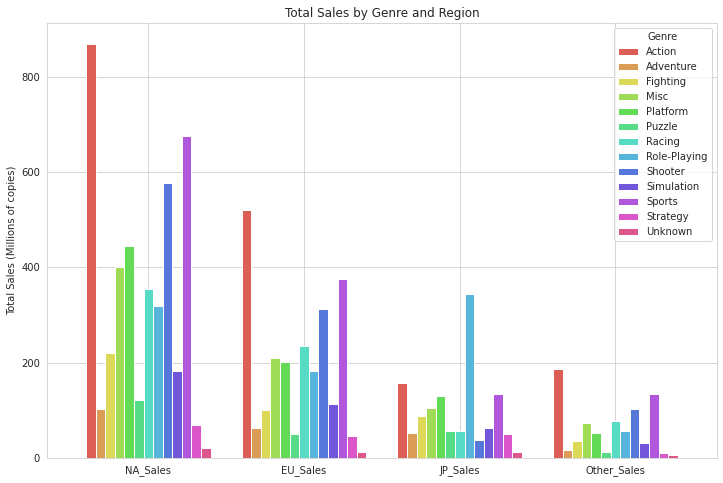

In [404]:
#지역별, 장르별 출고량을 시각화
df_genre_sales = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

sns.set_style('whitegrid')
colors = sns.color_palette("hls", len(df_genre_sales.index))
df_genre_sales.T.plot(kind='bar', figsize=(12, 8), title='Total Sales by Genre and Region', color=colors, width=0.8)
plt.xticks(rotation=0)
plt.ylabel('Total Sales (Millions of copies)')
plt.show()

# 컬러 팔레트 종류
# 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r',
# 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 
# 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 
# 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn',
# 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 
# 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r',
# 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg',
# 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'mag...

In [405]:
df_genre_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,868.94,520.35,156.62,186.02
Adventure,101.92,63.73,51.89,16.70
Fighting,220.93,100.04,87.14,36.20
Misc,400.29,210.27,104.18,72.76
Platform,445.38,200.65,130.53,51.45
Puzzle,121.59,50.51,56.24,12.44
Racing,354.74,235.07,56.32,76.52
Role-Playing,318.76,183.10,343.22,56.77
Shooter,577.09,312.36,38.19,102.46


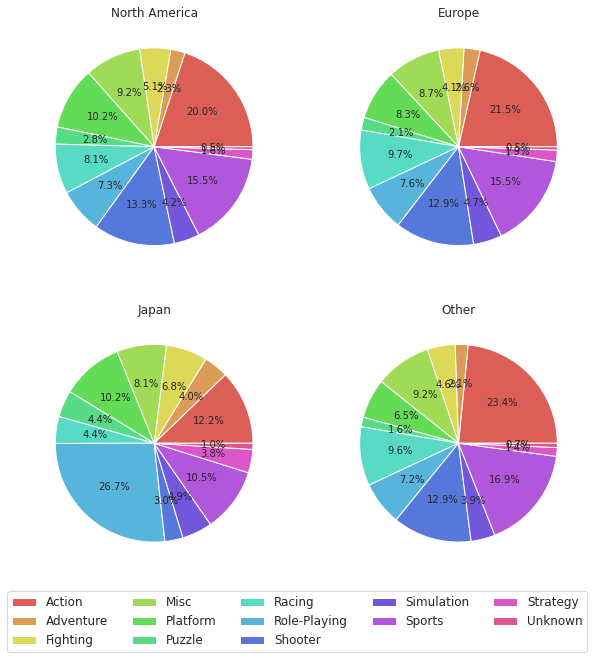

In [406]:
#서브플롯 그리기
fig, axes = plt.subplots(2, 2,figsize=(10,10))

colors = sns.color_palette("hls", len(df_genre_sales.index))

# 각 서브플롯에 파이차트 그리기

axes[0][0].pie(df_genre_sales['NA_Sales'], autopct="%1.1f%%", colors=colors)
axes[0][0].set_title("North America")
axes[0][1].pie(df_genre_sales['EU_Sales'], autopct="%1.1f%%", colors=colors)
axes[0][1].set_title("Europe")
axes[1][0].pie(df_genre_sales['JP_Sales'], autopct="%1.1f%%", colors=colors)
axes[1][0].set_title("Japan")
axes[1][1].pie(df_genre_sales['Other_Sales'], autopct="%1.1f%%", colors=colors)
axes[1][1].set_title("Other")

fig.legend(df_genre_sales.index, loc="lower center", ncol=5, prop={"size": 12})

# 플롯 보여주기
plt.show()

북미지역에서는 **액션(Action)** 장르가 **20%**, **스포츠(Sports)** 장르가 **15.5%**, **슈터(Shooter)** 장르가 **13.3%** 순으로 인기가 있습니다.

유럽지역에서는 **액션(Action)** 장르가 **21.5%**, **스포츠(Sports)** 장르가 **15.5%**, **슈터(Shooter)** 장르가 **12.9%** 순으로 인기가 있습니다.

일본지역에서는 **롤플레잉(Role-playing)** 장르가 **26.7%**, **액션(Action)** 장르가 **12.2%**, **스포츠(Sports)** 장르가 **10.5%** 순으로 인기가 있습니다.

기타지역에서는 **액션(Action)** 장르가 **23.4%**, **스포츠(Sports)** 장르가 **16.9%**, **슈터(Shooter)** 장르가 **12.9%** 순으로 인기가 있습니다.

2. **연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.**
* 트렌드는 어떤 것을 기준으로 파악했나요? 출고량
* 연도별로 트렌드가 존재하나요?
* 왜 존재한다/존재하지 않는다고 생각했나요?

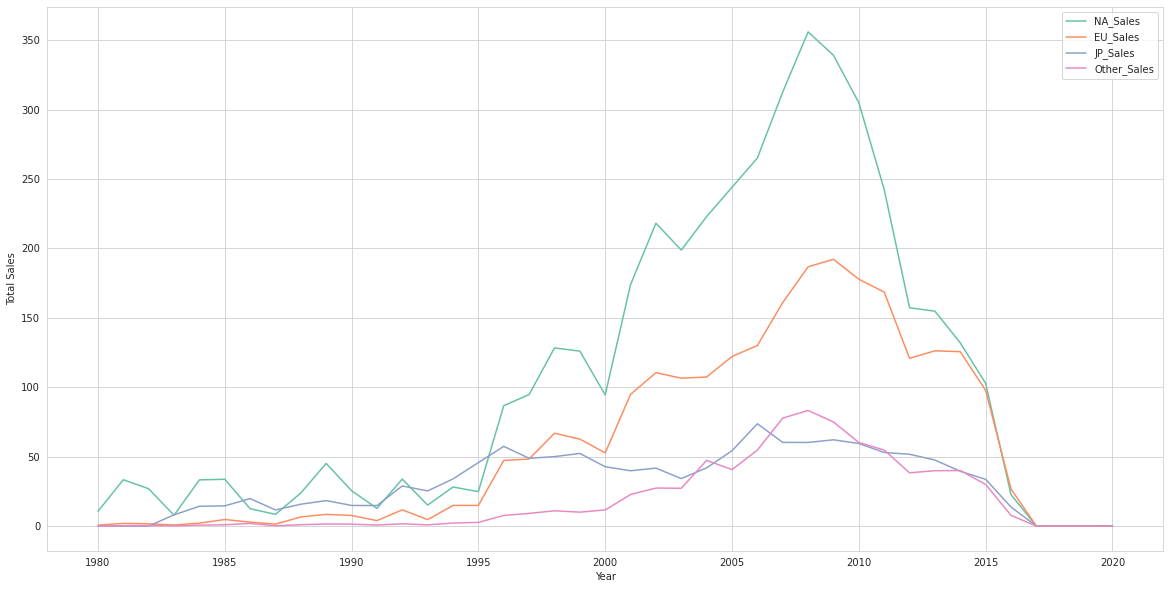

In [407]:
df_year_sales = df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
df_year_sales.plot(figsize=(20, 10))
plt.ylabel('Total Sales')
plt.show()

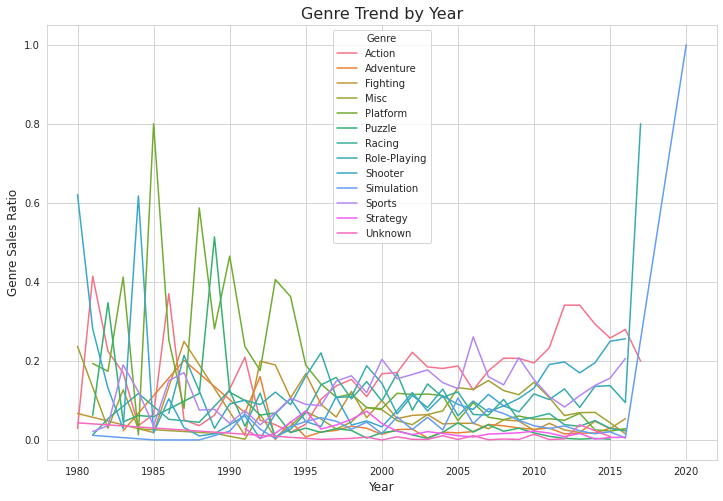

In [408]:
# 연도별 장르별 총 매출액 계산
df_genre_trend = df.groupby(['Year','Genre'], as_index=False)['Total_Sales'].sum()

# 연도별 총 매출액 계산
df_year_sales = df.groupby(['Year'], as_index=False)['Total_Sales'].sum()

# 새로운 데이터프레임 생성
df_genre_year_sales = pd.merge(df_genre_trend, df_year_sales, on='Year')

# 연도별 각 장르의 비율 계산
df_genre_year_sales['Ratio'] = df_genre_year_sales['Total_Sales_x'] / df_genre_year_sales['Total_Sales_y']

# 연도별 각 장르의 비율을 wide format으로 변환
df_genre_trend_pivot = df_genre_year_sales.pivot(index='Year', columns='Genre', values='Ratio')

# 연도별 각 장르의 비율을 시각화
plt.figure(figsize=(12,8))
sns.lineplot(data=df_genre_trend_pivot, dashes=False)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Genre Sales Ratio', fontsize=12)
plt.title('Genre Trend by Year', fontsize=16)
plt.show()

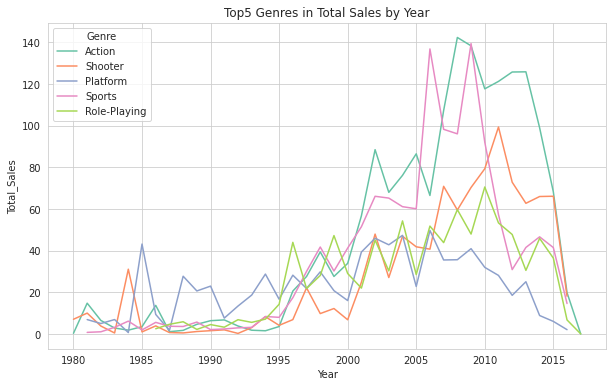

In [437]:
# Top5 장르 선정
top5_genre = df.groupby('Genre')['Total_Sales'].sum().sort_values(ascending=False).head(5).index.tolist()

# 연도별 Top5 장르 선택
df_top5 = df[df['Genre'].isin(top5_genre)].groupby(['Year', 'Genre']).sum().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_top5, x='Year', y='Total_Sales', hue='Genre')
plt.title('Top5 Genres in Total Sales by Year')
plt.show()

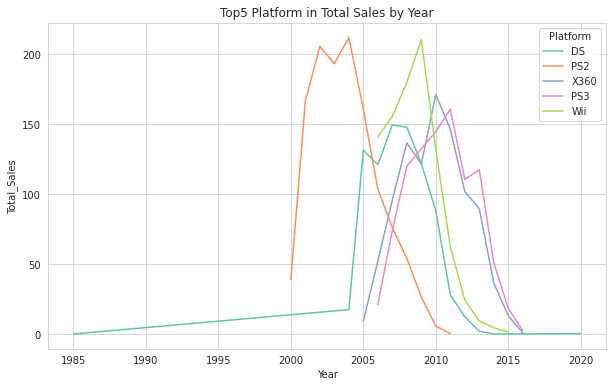

In [440]:
# Top5 플랫폼 선정
top5_platform = df.groupby('Platform')['Total_Sales'].sum().sort_values(ascending=False).head(5).index.tolist()

# 연도별 Top5 플랫폼 선택
df_top5_p = df[df['Platform'].isin(top5_platform)].groupby(['Year', 'Platform']).sum().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_top5_p, x='Year', y='Total_Sales', hue='Platform')
plt.title('Top5 Platform in Total Sales by Year')
plt.show()

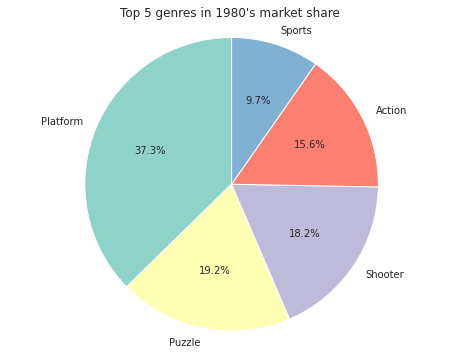

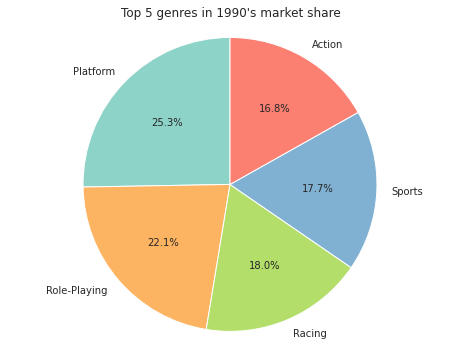

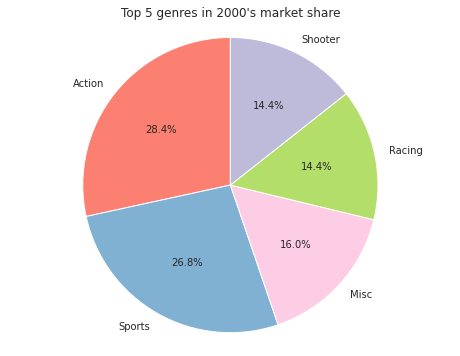

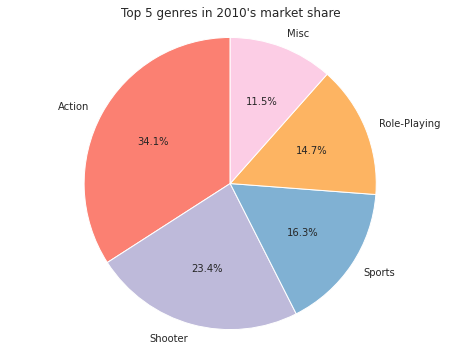

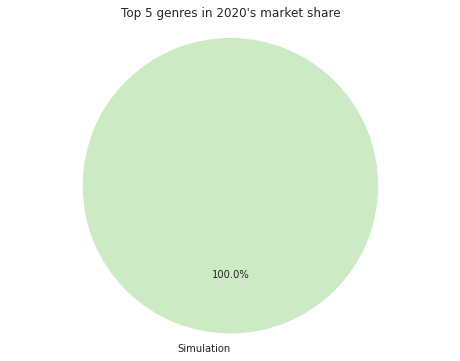

In [410]:
genres = df.groupby([(df['Year']//10)*10, 'Genre']).sum()
genres = genres.drop('Year', axis=1).reset_index()
genres = genres.sort_values(['Year', 'Total_Sales'], ascending=[True, False])
top_genres = genres.groupby('Year').head(5)

# 모든 장르를 리스트로 저장합니다
genres = genres['Genre'].unique() 

# hls 팔레트로 장르 개수만큼 색상 리스트 생성 후 딕셔너리로 변환합니다
colors = sns.color_palette('Set3', len(genres)) 
genre_colors = dict(zip(genres, colors)) 

# pie 플롯 그리기
years = top_genres['Year'].unique()
for year in years:
    plt.figure(figsize=(8, 6))
    data = top_genres[top_genres['Year'] == year]
    sizes = data['Total_Sales'].values
    labels = data['Genre'].values
    
    # 색상은 딕셔너리에서 장르별로 매칭된 색상으로 사용합니다
    colors = [genre_colors[genre] for genre in labels] 
    
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title(f"Top 5 genres in {year}'s market share")
    plt.axis('equal')
    plt.show()

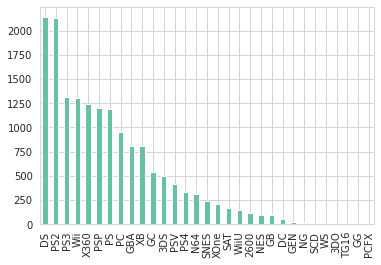

In [445]:
df['Platform'].value_counts()

# Sony: PS2, PS3, PS, PSP, PSV, PS4
# Nintendo: DS, Wii, GBA, GC, 3DS, N64, SNES, WiiU, NES, GB
# Microsoft: X360, XB, XOne
# PC: PC
# Sega: SAT, GEN, SC, DC
# 기타: 2600, NG, SCD, WS, 3DO, TG16, GG, PCFX

df['Platform'].value_counts().plot(kind='bar')
plt.show()

In [413]:
def categorize_company(platform):
    if platform in ['PS2', 'PS3', 'PS', 'PSP', 'PSV', 'PS4']:
        return 'Sony'
    elif platform in ['DS', 'Wii', 'GBA', 'GC', '3DS', 'N64', 'SNES', 'WiiU', 'NES', 'GB']:
        return 'Nintendo'
    elif platform in ['X360', 'XB', 'XOne']:
        return 'Microsoft'
    elif platform == 'PC':
        return 'PC'
    elif platform in ['SAT', 'GEN', 'SCD', 'DC']:
        return 'Sega'
    else:
        return 'Others'
df['Company'] = df['Platform'].apply(categorize_company)

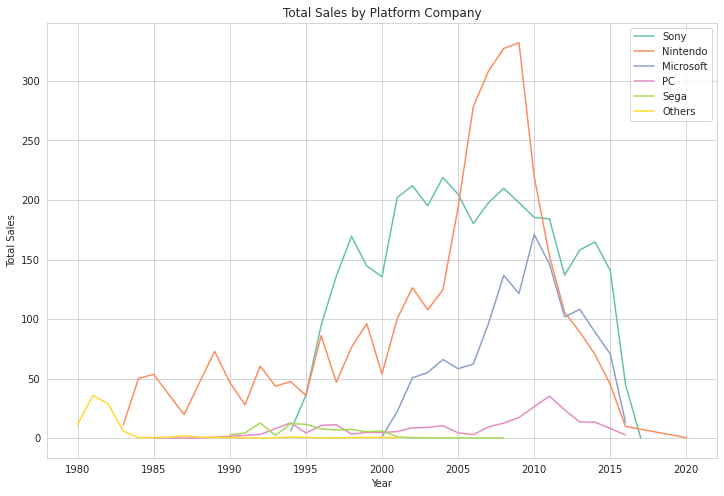

In [414]:
plt.figure(figsize=(12,8))

companies = ['Sony', 'Nintendo', 'Microsoft', 'PC', 'Sega', 'Others']

for company in companies:
    df_company = df[df['Company'] == company].groupby('Year').sum()
    plt.plot(df_company.index, df_company['Total_Sales'], label=company)

plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Platform Company')
plt.legend()
plt.show()

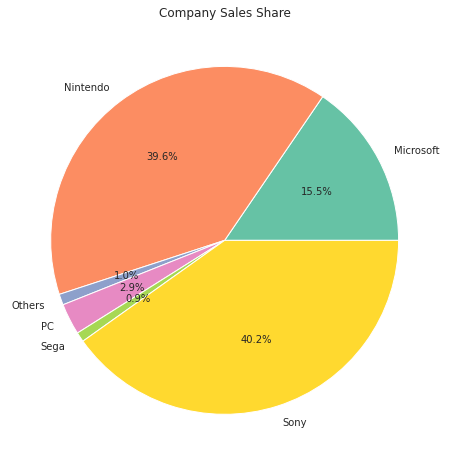

In [415]:
# 회사별 전체 출고량 계산
company_sales = df.groupby('Company')['Total_Sales'].sum()

# pie plot 그리기
plt.figure(figsize=(8,8))
plt.pie(company_sales, labels=company_sales.index, autopct='%1.1f%%')
plt.title('Company Sales Share')
plt.show()

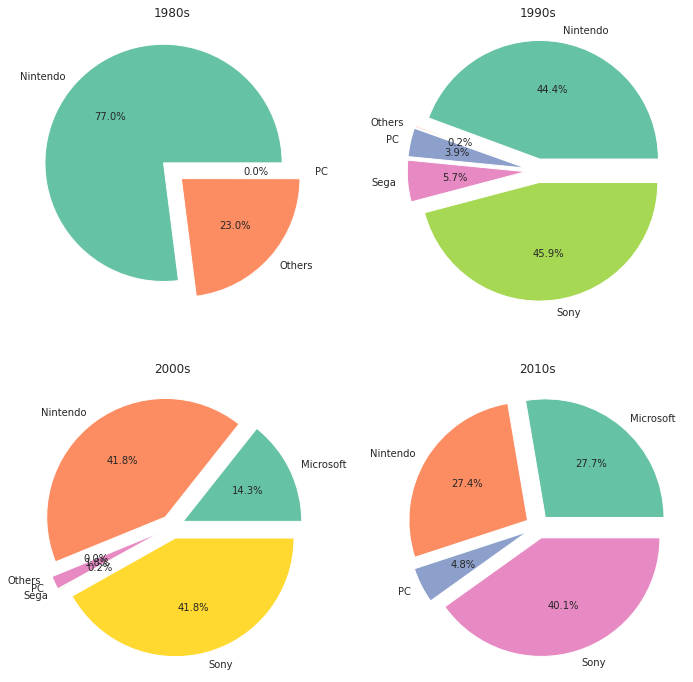

In [416]:
# 연도를 10년 단위로 묶기 위해 10으로 나눈 몫을 구합니다.
df['Decade'] = (df['Year'] // 10) * 10

# Decade와 Company별로 출고량의 합계를 구합니다.
sales_by_decade_company = df.groupby(['Decade', 'Company'])['Total_Sales'].sum().reset_index()

# Decade별로 데이터프레임을 분리합니다.
sales_1980 = sales_by_decade_company[sales_by_decade_company['Decade'] == 1980]
sales_1990 = sales_by_decade_company[sales_by_decade_company['Decade'] == 1990]
sales_2000 = sales_by_decade_company[sales_by_decade_company['Decade'] == 2000]
sales_2010 = sales_by_decade_company[sales_by_decade_company['Decade'] == 2010]

# 각 Decade별로 pieplot을 그립니다. explode는 각 조각이 떨어져 있는 정도를 의미하며, autopct는 각 조각의 백분율 표시 방식입니다.
plt.figure(figsize=(12,12)) # 그래프의 크기를 설정합니다.

plt.subplot(2,2,1) # 2x2의 첫 번째 위치에 그래프를 그립니다.
plt.pie(sales_1980['Total_Sales'], labels=sales_1980['Company'],explode=[0.1] * len(sales_1980), autopct='%1.1f%%')
plt.title('1980s') # 제목을 설정합니다.

plt.subplot(2,2,2) # 2x2의 두 번째 위치에 그래프를 그립니다.
plt.pie(sales_1990['Total_Sales'], labels=sales_1990['Company'],explode=[0.1] * len(sales_1990), autopct='%1.1f%%')
plt.title('1990s')

plt.subplot(2,2,3) # 2x2의 세 번째 위치에 그래프를 그립니다.
plt.pie(sales_2000['Total_Sales'], labels=sales_2000['Company'], explode=[0.1] * len(sales_2000), autopct='%1.1f%%')
plt.title('2000s')

plt.subplot(2,2,4) # 2x2의 네 번째 위치에 그래프를 그립니다.
plt.pie(sales_2010['Total_Sales'], labels=sales_2010['Company'],explode=[0.1] * len(sales_2010), autopct='%1.1f%%')
plt.title('2010s')

plt.show() # 그래프를 화면에 출력합니다.

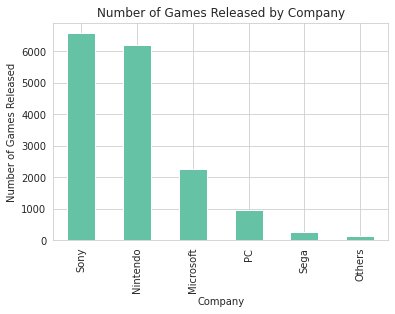

In [417]:
platform_counts = df['Company'].value_counts()

# 시각화하기
platform_counts.plot(kind='bar')
plt.xlabel('Company')
plt.ylabel('Number of Games Released')
plt.title('Number of Games Released by Company')
plt.show()

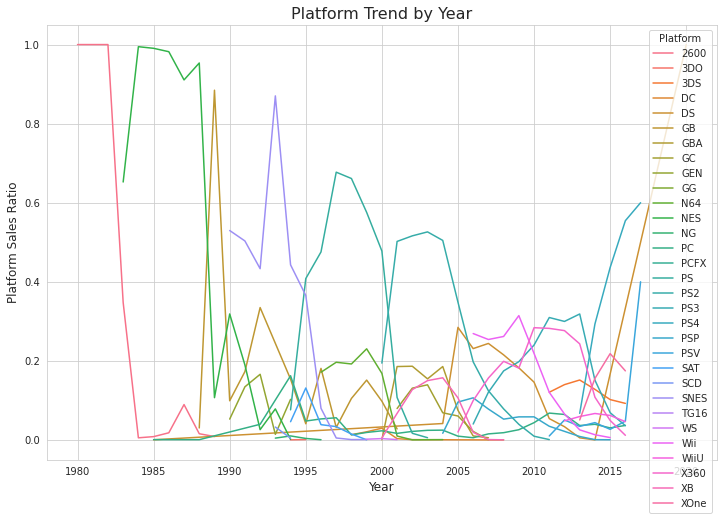

In [418]:
# 연도별 플랫폼별 총 매출액 계산
df_platform_trend = df.groupby(['Year','Platform'], as_index=False)['Total_Sales'].sum()

# 연도별 총 매출액 계산
df_year_sales = df.groupby(['Year'], as_index=False)['Total_Sales'].sum()

# 새로운 데이터프레임 생성
df_platform_year_sales = pd.merge(df_platform_trend, df_year_sales, on='Year')

# 연도별 각 플랫폼의 비율 계산
df_platform_year_sales['Ratio'] = df_platform_year_sales['Total_Sales_x'] / df_platform_year_sales['Total_Sales_y']

# 연도별 각 플랫폼의 비율을 wide format으로 변환
df_platform_trend_pivot = df_platform_year_sales.pivot(index='Year', columns='Platform', values='Ratio')

# 연도별 각 플랫폼의 비율을 시각화
plt.figure(figsize=(12,8))
sns.lineplot(data=df_platform_trend_pivot, dashes=False)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Platform Sales Ratio', fontsize=12)
plt.title('Platform Trend by Year', fontsize=16)
plt.show()

In [419]:
df_pivot = df.pivot_table(index='Year', columns='Genre', values='Total_Sales', aggfunc='sum')
df_pivot = df_pivot.fillna(0).reset_index(drop=True)

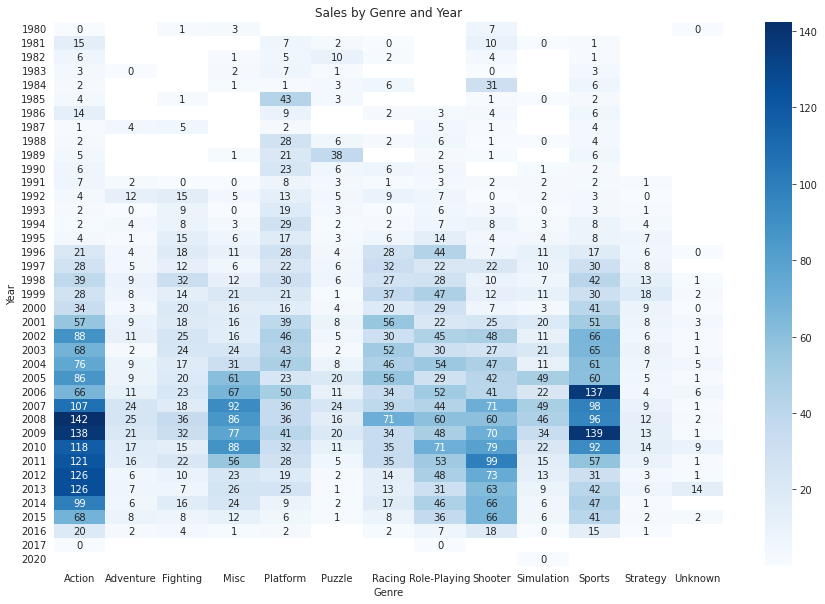

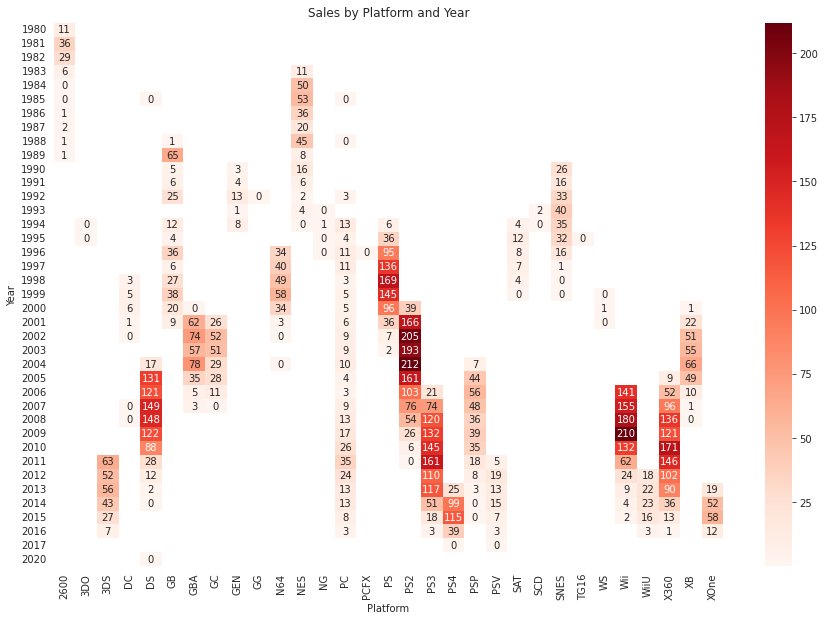

In [420]:
# 연도별로 장르의 출고량을 합산합니다.
genre_by_year = df.groupby(['Year','Genre'])['Total_Sales'].sum().reset_index()

# 연도별로 플랫폼의 출고량을 합산합니다.
platform_by_year = df.groupby(['Year','Platform'])['Total_Sales'].sum().reset_index()

# 연도별 장르의 출고량을 히트맵으로 시각화합니다.
plt.figure(figsize=(15,10))
sns.heatmap(genre_by_year.pivot('Year','Genre','Total_Sales'), cmap='Blues', annot=True, fmt='.0f')
plt.title('Sales by Genre and Year')
plt.show()

# 연도별 플랫폼의 출고량을 히트맵으로 시각화합니다.
plt.figure(figsize=(15,10))
sns.heatmap(platform_by_year.pivot('Year','Platform','Total_Sales'), cmap='Reds', annot=True, fmt='.0f')
plt.title('Sales by Platform and Year')
plt.show()

# 시각화 결과에 대해 설명드리겠습니다.

# 연도별 장르의 출고량 히트맵을 보면, 2000년대 초반에는 스포츠와 레이싱 장르가 인기가 있었으나, 
# 2000년대 중반부터는 액션과 슈팅 장르가 인기를 끌었습니다. 2010년대 이후에는 롤플레잉과 어드벤처 장르가 상승세를 보였습니다.
# 연도별 플랫폼의 출고량 히트맵을 보면, 2000년대 초반에는 PS2와 X360이 시장을 주도하였으나, 
# 2010년대 이후에는 PS4와 XOne이 선두를 달렸습니다. 닌텐도의 DS와 Wii는 2006년과 2009년에 각각 최고점을 찍었으나 이후 하락세를 보였습니다. PC는 꾸준한 출고량을 유지하였습니다.

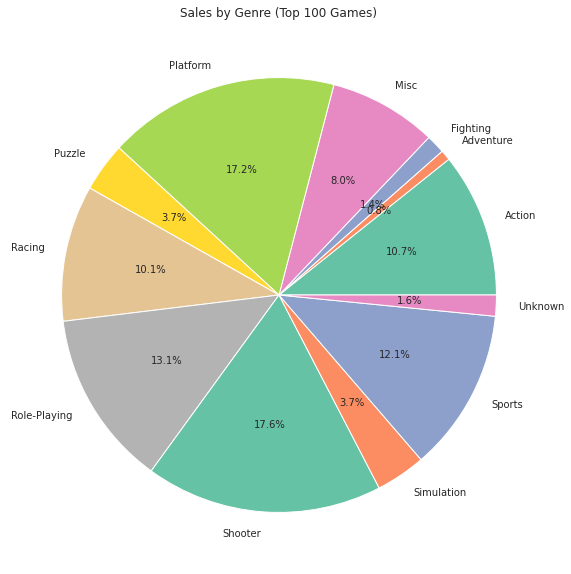

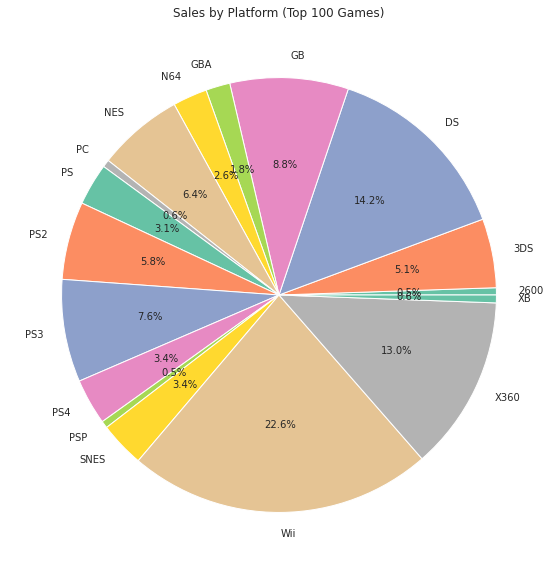

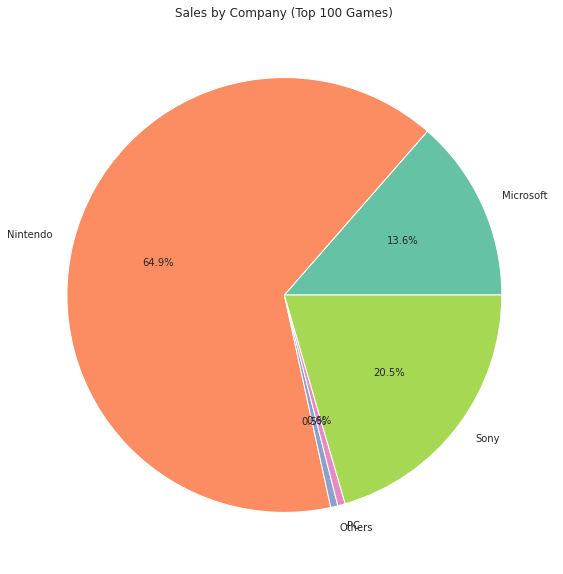

In [421]:
# 출고량 상위 100개의 게임을 선택합니다.
top_100 = df.sort_values(by='Total_Sales', ascending=False).head(100)

# 장르별로 출고량을 합산합니다.
genre_top_100 = top_100.groupby('Genre')['Total_Sales'].sum().reset_index()

# 플랫폼별로 출고량을 합산합니다.
platform_top_100 = top_100.groupby('Platform')['Total_Sales'].sum().reset_index()

# 회사별로 출고량을 합산합니다.
company_top_100 = top_100.groupby('Company')['Total_Sales'].sum().reset_index()

# 장르별 출고량을 파이 차트로 시각화합니다.
plt.figure(figsize=(10,10))
plt.pie(genre_top_100['Total_Sales'], labels=genre_top_100['Genre'], autopct='%1.1f%%')
plt.title('Sales by Genre (Top 100 Games)')
plt.show()

# 플랫폼별 출고량을 파이 차트로 시각화합니다.
plt.figure(figsize=(10,10))
plt.pie(platform_top_100['Total_Sales'], labels=platform_top_100['Platform'], autopct='%1.1f%%')
plt.title('Sales by Platform (Top 100 Games)')
plt.show()

# 회사별 출고량을 파이 차트로 시각화합니다.
plt.figure(figsize=(10,10))
plt.pie(company_top_100['Total_Sales'], labels=company_top_100['Company'], autopct='%1.1f%%')
plt.title('Sales by Company (Top 100 Games)')
plt.show()

In [422]:
df.groupby('Company')['Total_Sales'].sum().reset_index().sort_values('Total_Sales',ascending=False)

,Company,Total_Sales
5,Sony,3556.14
1,Nintendo,3502.83
0,Microsoft,1369.91
3,PC,257.18
2,Others,89.67
4,Sega,79.75


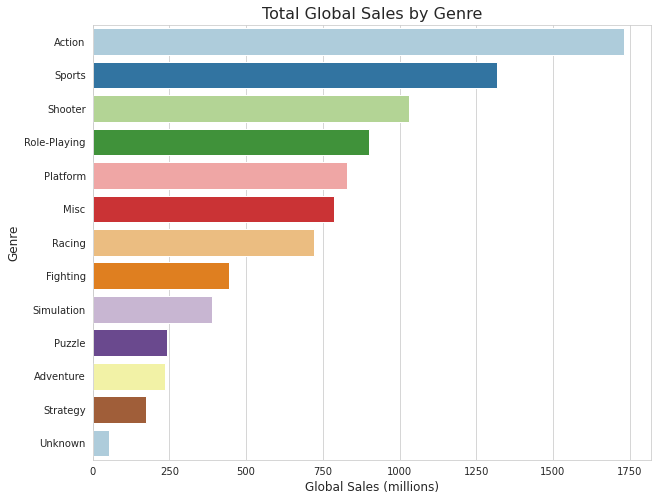

In [423]:
top20 = df.sort_values('Total_Sales', ascending=False).head(20)
genre_sales = df.groupby('Genre')['Total_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x=genre_sales, y=genre_sales.index, palette='Paired')
plt.title('Total Global Sales by Genre', fontsize=16)
plt.xlabel('Global Sales (millions)', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()

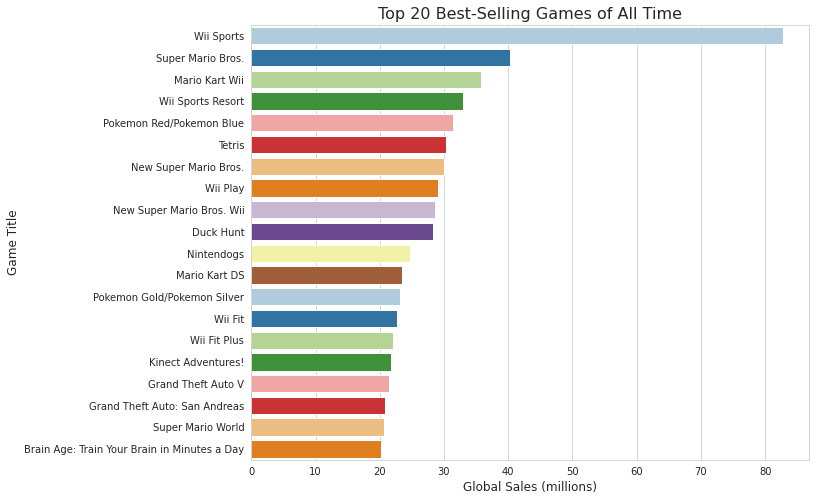

In [424]:
top20 = df.sort_values('Total_Sales', ascending=False).head(20)
genre_sales = df.groupby('Genre')['Total_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x='Total_Sales', y='Name', data=top20, palette='Paired')
plt.title('Top 20 Best-Selling Games of All Time', fontsize=16)
plt.xlabel('Global Sales (millions)', fontsize=12)
plt.ylabel('Game Title', fontsize=12)
plt.show()

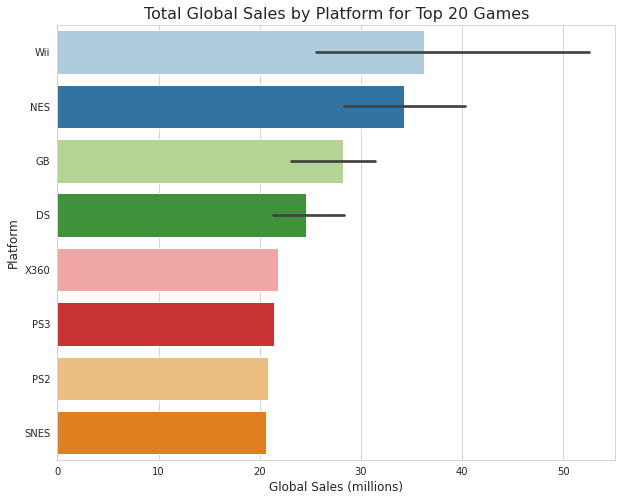

In [425]:
plt.figure(figsize=(10,8))
sns.barplot(x='Total_Sales', y='Platform', data=top20, palette='Paired')
plt.title('Total Global Sales by Platform for Top 20 Games', fontsize=16)
plt.xlabel('Global Sales (millions)', fontsize=12)
plt.ylabel('Platform', fontsize=12)
plt.show()

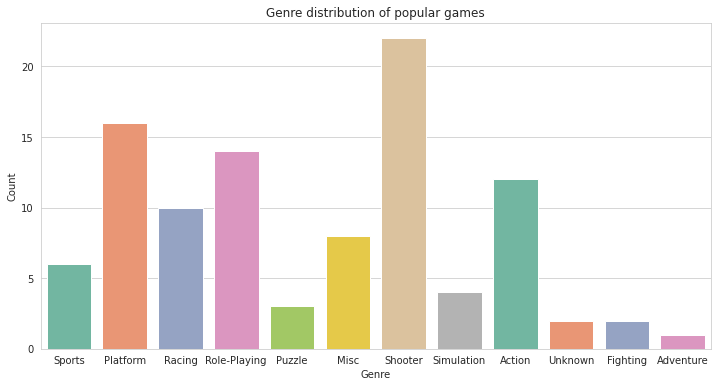

In [426]:
popular_games = df.sort_values('Total_Sales', ascending=False).head(100)

plt.figure(figsize=(12,6))
sns.countplot(x='Genre', data=popular_games, palette='Set2')
plt.title('Genre distribution of popular games')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

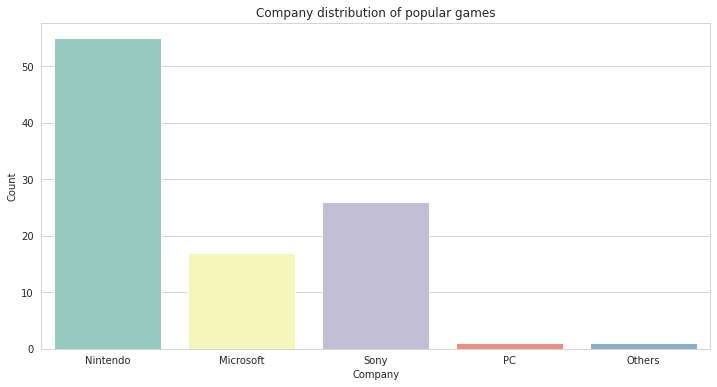

In [427]:
plt.figure(figsize=(12,6))
sns.countplot(x='Company', data=popular_games, palette='Set3')
plt.title('Company distribution of popular games')
plt.xlabel('Company')
plt.ylabel('Count')
plt.show()

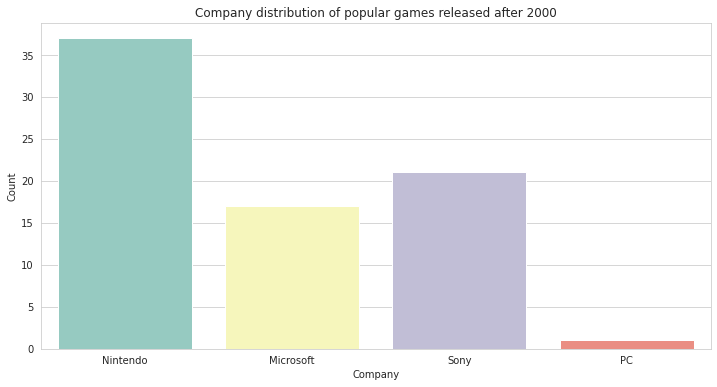

In [428]:
plt.figure(figsize=(12,6))
sns.countplot(x='Company', data=popular_games[popular_games['Year'] >= 2000], palette='Set3')
plt.title('Company distribution of popular games released after 2000')
plt.xlabel('Company')
plt.ylabel('Count')
plt.show()

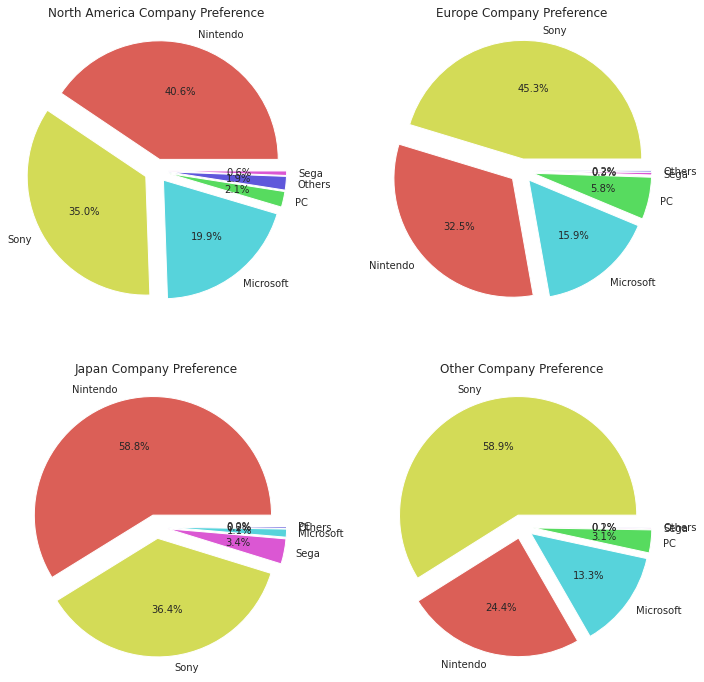

In [429]:
colors = sns.color_palette('hls', len(df['Company'].unique())) 
color_dict = dict(zip(df['Company'].unique(), colors))


na_platform_sales = df.groupby('Company')['NA_Sales'].sum().sort_values(ascending=False)
eu_platform_sales = df.groupby('Company')['EU_Sales'].sum().sort_values(ascending=False)
jp_platform_sales = df.groupby('Company')['JP_Sales'].sum().sort_values(ascending=False)
other_platform_sales = df.groupby('Company')['Other_Sales'].sum().sort_values(ascending=False)

fig, axes = plt.subplots(2, 2, figsize=(12,12))
axes[0][0].pie(na_platform_sales.values, labels=na_platform_sales.index, autopct='%1.1f%%', colors=[color_dict[x] for x in na_platform_sales.index],explode=[0.1] * len(na_platform_sales))
axes[0][0].set_title('North America Company Preference')
axes[0][1].pie(eu_platform_sales.values, labels=eu_platform_sales.index, autopct='%1.1f%%', colors=[color_dict[x] for x in eu_platform_sales.index],explode=[0.1] * len(eu_platform_sales))
axes[0][1].set_title('Europe Company Preference')
axes[1][0].pie(jp_platform_sales.values, labels=jp_platform_sales.index, autopct='%1.1f%%', colors=[color_dict[x] for x in jp_platform_sales.index],explode=[0.1] * len(jp_platform_sales))
axes[1][0].set_title('Japan Company Preference')
axes[1][1].pie(other_platform_sales.values, labels=other_platform_sales.index, autopct='%1.1f%%', colors=[color_dict[x] for x in other_platform_sales.index],explode=[0.1] * len(other_platform_sales))
axes[1][1].set_title('Other Company Preference')
plt.show()

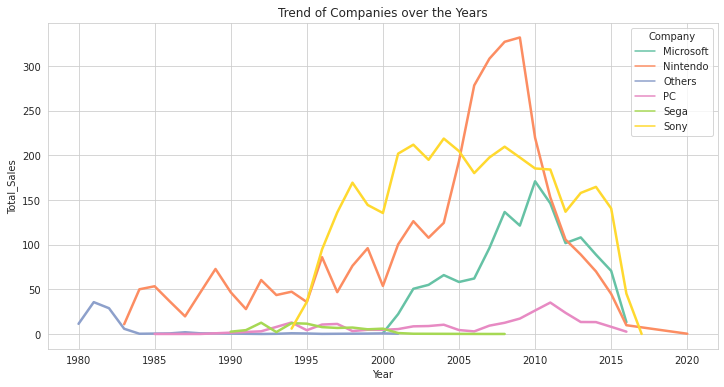

In [430]:
pivot = pd.pivot_table(df, values='Total_Sales', index='Year', columns='Company', aggfunc=np.sum)
plt.figure(figsize=(12, 6))
sns.lineplot(data=pivot, dashes=False, linewidth=2.5)
plt.title('Trend of Companies over the Years')
plt.xlabel('Year')
plt.ylabel('Total_Sales')
plt.show()